Исследователей интересовало влияние инъекции некоторого гормона (var4) на показатель концентрации кальция в плазме крови у птиц с учетом их пола.

In [22]:
import pandas as pd
import matplotlib.pyplot as plt 
import statsmodels.api as sm 
from statsmodels.formula.api import ols 
import seaborn as sns 
import numpy as np 
import pandas.tseries 
plt.style.use('fivethirtyeight')
%matplotlib inline

# Источник: https://pythonpip.ru/osnovy/anova-test-na-python-pogruzhaemsya-v-dispersionnyy-analiz

In [10]:
birds = pd.read_csv('D:\\BSNS\\STUDY\\Stepik\\Основы Статистики\\birds.csv')

In [11]:
birds

,var4,hormone,sex
0,17.859039,1,1
1,20.842343,1,1
2,19.318099,1,1
3,20.064451,1,1
4,17.620316,1,1
...,...,...,...
59,17.054195,0,0
60,22.951551,0,0
61,18.799382,0,0
62,16.543161,0,0


In [6]:
birds.dtypes

var4       float64
hormone      int64
sex          int64
dtype: object

In [17]:
birds.size

192

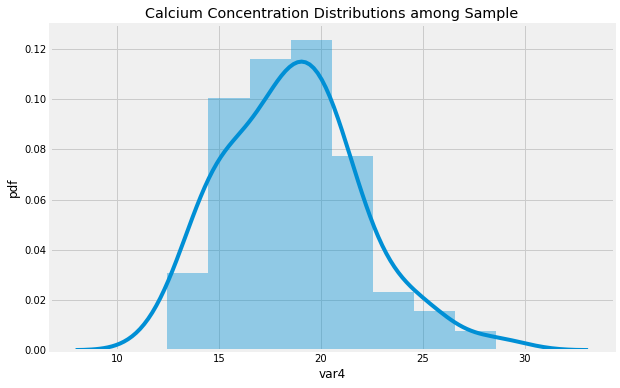

In [41]:
# Построим график с помощью функции distplot(), чтобы понять распределение количественного признака в выборке

f, ax = plt.subplots(figsize =(9,6))
sns.distplot(birds.var4)
plt.title('Calcium Concentration Distributions among Sample') 
plt.ylabel('pdf') 
plt.show() 

# Источник: https://pythonpip.ru/osnovy/anova-test-na-python-pogruzhaemsya-v-dispersionnyy-analiz

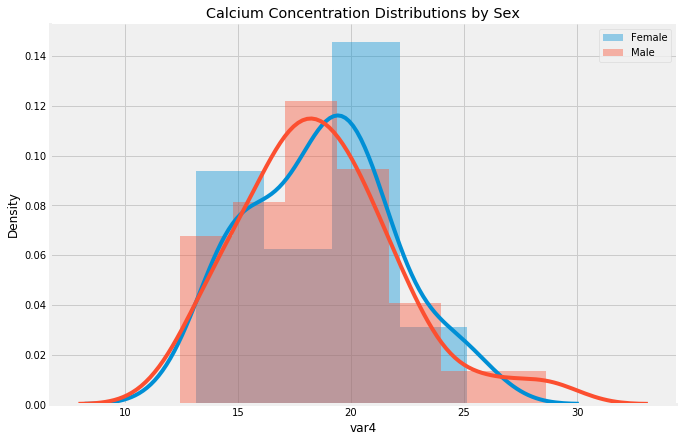

In [51]:
# Построим график распределения количественного признака в выборке по полу

f, ax = plt.subplots(figsize =(10,7)) 
sns.distplot(birds[birds['sex']==1].var4, label='Female')
sns.distplot(birds[birds['sex']==0].var4, label='Male')
plt.title('Calcium Concentration Distributions by Sex')
plt.ylabel('Density')
plt.legend()
sns.despine()  # убрать часть рамки графика

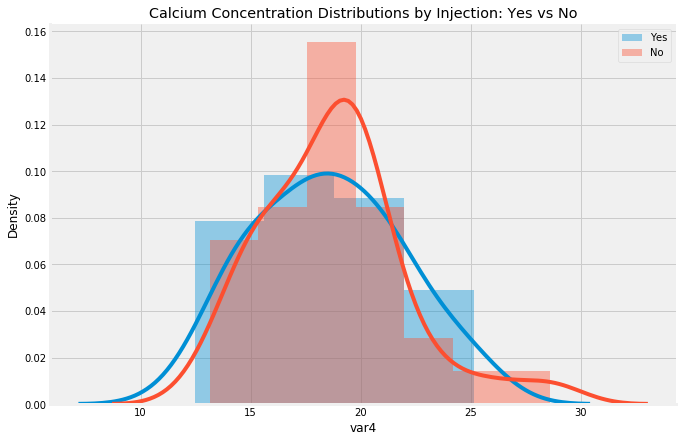

In [50]:
# Построим график распределения количественного признака в выборке по инъекции (была или нет)

f, ax = plt.subplots(figsize =(10,7)) 
sns.distplot(birds[birds['hormone']==1].var4, label='Yes')
sns.distplot(birds[birds['hormone']==0].var4, label='No')
plt.title('Calcium Concentration Distributions by Injection: Yes vs No')
plt.ylabel('Density')
plt.legend()
sns.despine()  # убрать часть рамки графика

In [48]:
# Посмотрим статистику по выборке
birds.groupby(['hormone', 'sex'], as_index=False).agg(['count', 'mean', np.std]).var4

count       mean       std
hormone sex                            
0       0       16  19.887291  3.677211
        1       16  17.608916  2.449753
1       0       16  17.292254  2.864428
        1       16  19.743662  3.383574

In [52]:
# Выполним двухфакторный ANOVA
expr_lm = ols('var4 ~ hormone*sex', data=birds).fit()
table = sm.stats.anova_lm(expr_lm, type=2) # Type 2 Anova DataFrame
print(table)

               df      sum_sq    mean_sq         F    PR(>F)
hormone       1.0    0.847472   0.847472  0.086528  0.769653
sex           1.0    0.119762   0.119762  0.012228  0.912318
hormone:sex   1.0   89.483384  89.483384  9.136390  0.003682
Residual     60.0  587.650394   9.794173       NaN       NaN


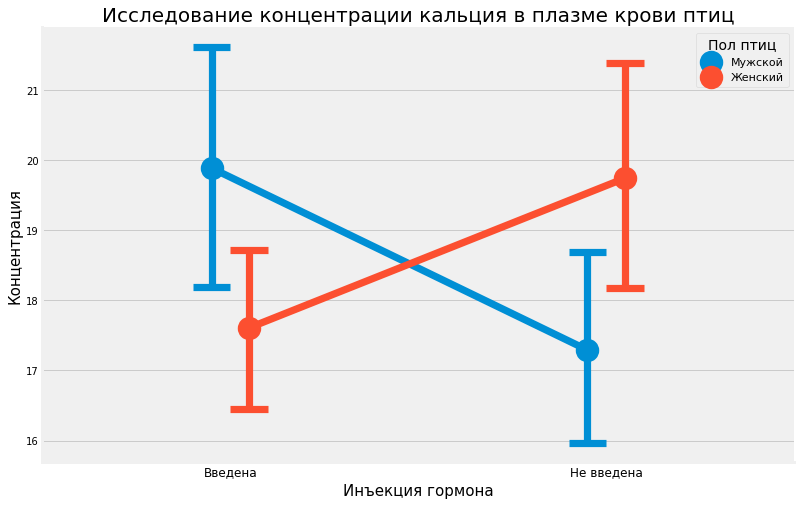

In [64]:
# Построим график взаимодействия факторов

f, ax = plt.subplots(figsize =(12,8))
# строим график с помощью seaborn
pplot = sns.pointplot(x='hormone', y='var4', hue='sex', dodge=0.1, capsize=.1, data=birds)
# меняем названия титула, оси х и оси у
plt.title('Исследование концентрации кальция в плазме крови птиц', fontsize=20)
plt.xlabel('Инъекция гормона', fontsize=15)
plt.ylabel('Концентрация', fontsize=15)
# меняем названия отложенных по оси х значений
bars = ('Введена', 'Не введена')
x_pos = np.arange(len(bars))
plt.xticks(x_pos, bars, fontsize=12)
# меняем "Легенду" та, что в верхнем правом углу
leg_handles = pplot.get_legend_handles_labels()[0]
pplot.legend(leg_handles, ['Мужской', 'Женский'], title='Пол птиц', title_fontsize=14, fontsize=11)

sns.despine()

#### Заключение
При введении гормона концентрация кальция в крови птиц мужского пола увеличилась, а в крови птиц женского пола уменьшилась (!).
